In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import minmax_scale

### Global Variables

In [2]:
start, end = '2020-03-06', '2021-01-27'
start_lockdown1, start_lockdown2, start_lockdown3 = '2020-03-16', '2020-11-17', '2020-12-26'
end_lockdown1, end_lockdown2, end_lockdown3 = '2020-04-20', '2020-12-06', '2021-02-07'
input_postings = r'../data/preprocessing/combined_postings_final.pickle'
input_summer_gap = r'../data/preprocessing/year_20_final.pickle'
input_survey = r'../data/survey_data_covid_variables.csv'
input_stringency = r'../data/OxCGRT_StringencyCasesDataset.csv'

### Load datasets

Load and analyize survey dataset:

In [3]:
survey = pd.read_csv(input_survey)
survey_sub = survey[['welle', 'co05_01', 'co06_01', 'co06_02', 'co06_03', 'co06_04', 'co06_05', 'co06_06', 'co08_01', 'co19_01']]
survey_sub.head()

e:\users\moritz\dokumente\uni\ipds_standardforum\venv\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (27,30) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,welle,co05_01,co06_01,co06_02,co06_03,co06_04,co06_05,co06_06,co08_01,co19_01
0,1,3,2,4,4,4,4,4,3,NaN
1,1,3,1,1,-1,-1,-1,1,1,NaN
2,1,1,1,2,-1,3,4,2,3,NaN
3,1,2,2,2,1,2,1,2,1,NaN
4,1,3,4,3,4,3,4,3,5,NaN


In [4]:
survey_wave_map = {
    1: pd.to_datetime('5.5.2020'),
    2: pd.to_datetime('5.28.2020'),
    3: pd.to_datetime('6.17.2020'),
    4: pd.to_datetime('7.8.2020'),
    5: pd.to_datetime('7.30.2020'),
    6: pd.to_datetime('8.22.2020'),
    7: pd.to_datetime('9.14.2020'),
    8: pd.to_datetime('9.29.2020'),
    9: pd.to_datetime('10.21.2020'),
    10: pd.to_datetime('11.11.2020'),
    11: pd.to_datetime('11.28.2020'),
    12: pd.to_datetime('12.22.2020'),
}

In [5]:
survey_sub['wave_end'] = pd.to_datetime(survey_sub['welle'].map(survey_wave_map))

<ipython-input-5-6168f1e47519>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survey_sub['wave_end'] = pd.to_datetime(survey_sub['welle'].map(survey_wave_map))


In [6]:
survey_sub = survey_sub.set_index('wave_end')

Load and analyze postings dataset:

In [12]:
cols_to_drop = ['rid', 'ppid', 'o', 'hl', 'tx', 'cn', '13', '16', '17', '19', '31', '200', 'pid_liwc']
postings = pd.read_pickle(input_postings).drop(cols_to_drop, axis=1)
postings.index = pd.to_datetime(postings.cd, utc=True)
postings['anger'] = postings['18']/postings['number_tokens']
postings.head()

,oid,pid,cd,vp,vn,allText,18,number_tokens,anger
cd,,,,,,,,,
2020-12-31 19:04:57.643000+00:00,2000122865130,1064710786,2020-12-31 20:04:57.643000+01:00,4,0,Herr Bundespräsidentnach Artikel 70 B-VG könne...,0,28,0.0
2021-01-01 05:00:14.350000+00:00,2000122865130,1064724063,2021-01-01 06:00:14.350000+01:00,2,0,Der Flash wird noch eine weitere Amtszeit dafü...,0,9,0.0
2020-12-31 19:57:02.017000+00:00,2000122865130,1064712838,2020-12-31 20:57:02.017000+01:00,2,0,Das ist wahrscheinlich sogar unserem HBP zu pe...,0,8,0.0
2020-12-31 18:09:04.760000+00:00,2000122865130,1064708391,2020-12-31 19:09:04.760000+01:00,3,0,Ausnahmegesetze für unseren Ausnahmenkanzler ...,0,4,0.0
2020-12-31 17:43:57.973000+00:00,2000122865130,1064707195,2020-12-31 18:43:57.973000+01:00,3,0,Anschober will...Anschober kann aber nicht.,0,5,0.0


In [13]:
#postings['anger'].hist()

Load and analyze dataset of articles to fill gap in the summer

In [14]:
postings_summer_gap = pd.read_pickle(input_summer_gap).sort_index()
postings_summer_gap.index = pd.to_datetime(postings_summer_gap.index, utc=True)
postings_summer_gap.tail()

,postid,parentid,communityidentityid,communityname,timestamp,followers,ratings_pos,ratings_neg,fullText,13,16,17,18,19,31,200,number_tokens
timestamp,,,,,,,,,,,,,,,,,
2021-01-11 21:13:29+00:00,1065338274,1.064871e+09,748531.0,ThomasSV,1610399609,0.0,0,0,Sehe ich nicht... Wenn man das in einen TV Spl...,1,0,0,0,0,1,0,51
2021-01-11 21:18:30+00:00,1065338499,1.064888e+09,748531.0,ThomasSV,1610399910,0.0,0,0,"Es steht Ihnen frei, Politiker zu werden und a...",2,1,0,0,0,2,0,24
2021-01-11 21:22:40+00:00,1065338708,1.064853e+09,748531.0,ThomasSV,1610400160,0.0,0,0,Die Lösung ist schon lange bekannt ;)https://w...,0,0,0,0,0,0,0,7
2021-01-11 21:35:02+00:00,1065339290,1.063851e+09,567219.0,lupos,1610400902,1.0,0,0,"Konsum von Alkohol in Liter 2016RUS: 20,1 AUT:...",0,0,0,0,0,0,0,10
2021-01-11 22:50:27+00:00,1065342095,1.065338e+09,209091.0,StefVienna,1610405427,8.0,0,0,"Sie bestreiten also generell, daß hier ordentl...",0,1,0,1,0,2,0,19


In [15]:
postings_summer_gap['anger2'] = postings_summer_gap['18'] / postings_summer_gap['number_tokens']

In [16]:
p1 = pd.DataFrame(postings['anger'])
p1.index = postings['pid']

p2 = pd.DataFrame(postings_summer_gap['anger2'])
p2.index = postings_summer_gap['postid']

Create dataframe containing liveticker (anger) and articles (anger2) counts as well as the sum

In [18]:
combined = pd.concat([postings['anger'].resample('1d').sum(), postings_summer_gap['anger2'].resample('1d').sum()], axis=1)
combined['anger_total'] = combined['anger'].fillna(0) + combined['anger2'].fillna(0)
combined

Create baseline difference for selected surey questions

In [20]:
survey_grouped = survey_sub.groupby('welle').resample('1d').mean()
survey_grouped.index = survey_grouped.index.droplevel('welle')
survey_grouped['baseline_diff_05'] = (survey_grouped['co05_01'] - survey_grouped['co05_01'][0])/survey_grouped['co05_01'][0]
survey_grouped['baseline_diff_06_1'] = (survey_grouped['co06_01'] - survey_grouped['co06_01'][0])/survey_grouped['co06_01'][0]
survey_grouped['baseline_diff_06_2'] = (survey_grouped['co06_02'] - survey_grouped['co06_02'][0])/survey_grouped['co06_02'][0]
survey_grouped['baseline_diff_06_3'] = (survey_grouped['co06_03'] - survey_grouped['co06_03'][0])/survey_grouped['co06_03'][0]
survey_grouped['baseline_diff_06_4'] = (survey_grouped['co06_04'] - survey_grouped['co06_04'][0])/survey_grouped['co06_04'][0]
survey_grouped['baseline_diff_06_5'] = (survey_grouped['co06_05'] - survey_grouped['co06_05'][0])/survey_grouped['co06_05'][0]
survey_grouped['baseline_diff_06_6'] = (survey_grouped['co06_06'] - survey_grouped['co06_06'][0])/survey_grouped['co06_06'][0]
survey_grouped['baseline_diff_08'] = (survey_grouped['co08_01'] - survey_grouped['co08_01'][0])/survey_grouped['co08_01'][0]
survey_grouped['baseline_diff_19'] = (survey_grouped['co19_01'] - survey_grouped['co19_01'][9])/survey_grouped['co19_01'][9]
survey_grouped

,welle,co05_01,co06_01,co06_02,co06_03,co06_04,co06_05,co06_06,co08_01,co19_01,baseline_diff_05,baseline_diff_06_1,baseline_diff_06_2,baseline_diff_06_3,baseline_diff_06_4,baseline_diff_06_5,baseline_diff_06_6,baseline_diff_08,baseline_diff_19
wave_end,,,,,,,,,,,,,,,,,,,
2020-05-05,1.0,1.639361,2.182817,1.422577,0.564436,2.892108,2.083916,2.154845,2.535465,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
2020-05-28,2.0,1.612935,1.900498,1.254726,0.735323,2.503483,2.010945,1.963184,2.532338,NaN,-0.016119,-0.129337,-0.117991,0.302759,-0.134374,-0.035016,-0.088944,-0.001233,NaN
2020-06-17,3.0,1.617383,1.651349,1.199800,0.615385,2.144855,1.996004,1.879121,2.480519,NaN,-0.013406,-0.243478,-0.156601,0.090265,-0.258377,-0.042186,-0.127955,-0.021671,NaN
2020-07-08,4.0,2.043000,1.475000,1.064000,0.488000,1.916000,1.864000,1.628000,2.410000,NaN,0.246218,-0.324268,-0.252062,-0.135419,-0.337507,-0.105530,-0.244493,-0.049484,NaN
2020-07-30,5.0,2.285000,1.442000,1.057000,0.344000,1.871000,1.811000,1.709000,2.358000,NaN,0.393836,-0.339386,-0.256982,-0.390542,-0.353067,-0.130963,-0.206904,-0.069993,NaN
2020-08-22,6.0,2.093812,1.503992,1.081836,0.394212,1.885230,1.860279,1.838323,2.337325,NaN,0.277213,-0.310986,-0.239524,-0.301583,-0.348147,-0.107316,-0.146888,-0.078147,NaN
2020-09-14,7.0,2.126747,1.421158,1.055888,0.408184,1.867265,1.892216,1.811377,2.393214,NaN,0.297302,-0.348934,-0.257764,-0.276829,-0.354358,-0.091991,-0.159393,-0.056104,NaN
2020-09-29,8.0,2.158000,1.553000,1.109000,0.426000,2.028000,1.897000,1.822000,2.486000,NaN,0.316367,-0.288534,-0.220429,-0.245264,-0.298781,-0.089695,-0.154464,-0.019509,NaN
2020-10-21,9.0,2.120159,1.614697,1.092354,0.390268,2.077458,2.006951,1.811321,2.602781,NaN,0.293284,-0.260269,-0.232131,-0.308569,-0.281680,-0.036933,-0.159420,0.026550,NaN


<AxesSubplot:xlabel='wave_end'>

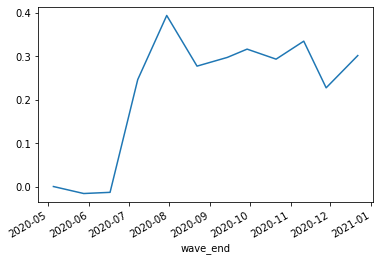

In [21]:
survey_grouped['baseline_diff_05'].plot()

### Plots

<ipython-input-22-d67f763ee58a>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(lables)


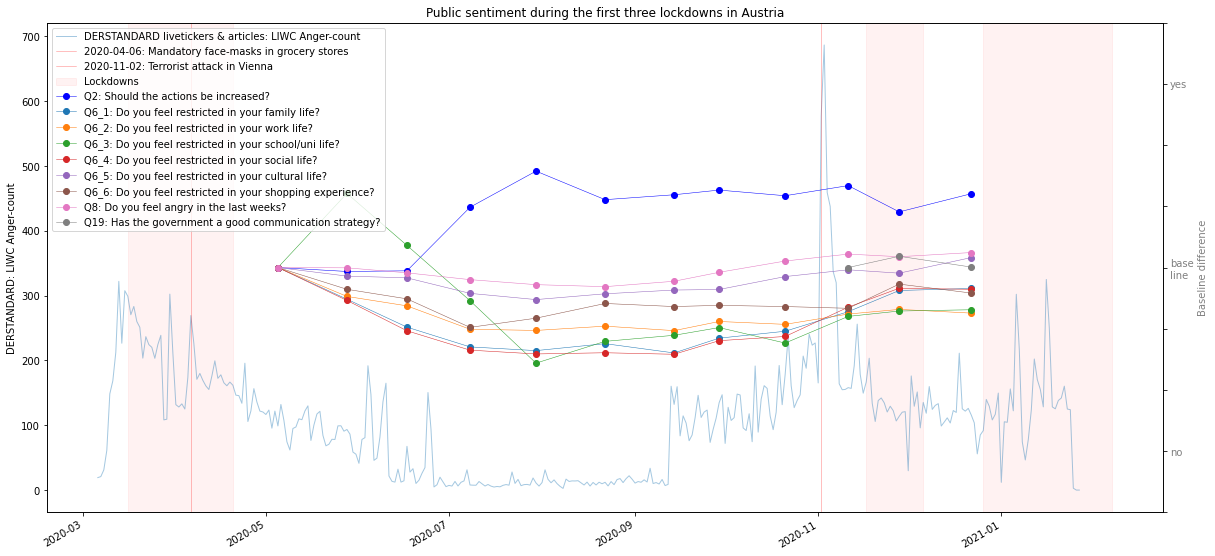

In [22]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(combined.loc[start:end, 'anger_total'], linestyle='-', linewidth=1, alpha=0.4, label='DERSTANDARD livetickers & articles: LIWC Anger-count')

ax.set_ylabel('DERSTANDARD: LIWC Anger-count')

ax.axvspan(pd.to_datetime(start_lockdown1), pd.to_datetime(end_lockdown1), color='red', alpha=0.05, label="Lockdowns")
ax.axvspan(pd.to_datetime(start_lockdown2), pd.to_datetime(end_lockdown2), color='red', alpha=0.05)
ax.axvspan(pd.to_datetime(start_lockdown3), pd.to_datetime(end_lockdown3), color='red', alpha=0.05)

ax.axvline(pd.to_datetime('2020-04-06'), linewidth=0.5, color='red', alpha=0.5, label='2020-04-06: Mandatory face-masks in grocery stores')
ax.axvline(pd.to_datetime('2020-11-02'), linewidth=0.5, color='red', alpha=0.5, label='2020-11-02: Terrorist attack in Vienna')

ax2 = ax.twinx()
ax2.set_ylim([-1,1])
lables = [item.get_text() for item in ax2.get_yticklabels()]
lables[1] = 'no'
lables[len(lables)-2] = 'yes'
lables[int(len(lables)/2)] = 'base\nline'
ax2.set_yticklabels(lables)
ax2.plot(survey_grouped.index, survey_grouped['baseline_diff_05'],label="Q2: Should the actions be increased?", linestyle='-', marker='o', linewidth=0.5, color='blue')
ax2.plot(survey_grouped.index, survey_grouped['baseline_diff_06_1'],label="Q6_1: Do you feel restricted in your family life?", linestyle='-', marker='o', linewidth=0.5)
ax2.plot(survey_grouped.index, survey_grouped['baseline_diff_06_2'],label="Q6_2: Do you feel restricted in your work life?", linestyle='-', marker='o', linewidth=0.5)
ax2.plot(survey_grouped.index, survey_grouped['baseline_diff_06_3'],label="Q6_3: Do you feel restricted in your school/uni life?", linestyle='-', marker='o', linewidth=0.5)
ax2.plot(survey_grouped.index, survey_grouped['baseline_diff_06_4'],label="Q6_4: Do you feel restricted in your social life?", linestyle='-', marker='o', linewidth=0.5)
ax2.plot(survey_grouped.index, survey_grouped['baseline_diff_06_5'],label="Q6_5: Do you feel restricted in your cultural life?", linestyle='-', marker='o', linewidth=0.5)
ax2.plot(survey_grouped.index, survey_grouped['baseline_diff_06_6'],label="Q6_6: Do you feel restricted in your shopping experience?", linestyle='-', marker='o', linewidth=0.5)
ax2.plot(survey_grouped.index, survey_grouped['baseline_diff_08'],label="Q8: Do you feel angry in the last weeks?", linestyle='-', marker='o', linewidth=0.5)
ax2.plot(survey_grouped.index, survey_grouped['baseline_diff_19'],label="Q19: Has the government a good communication strategy?", linestyle='-', marker='o', linewidth=0.5)

ax2.tick_params(axis='y', labelcolor='gray')

fig.autofmt_xdate()
ax2.set_ylabel("Baseline difference", color='gray')
ax.set_title("Public sentiment during the first three lockdowns in Austria")

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

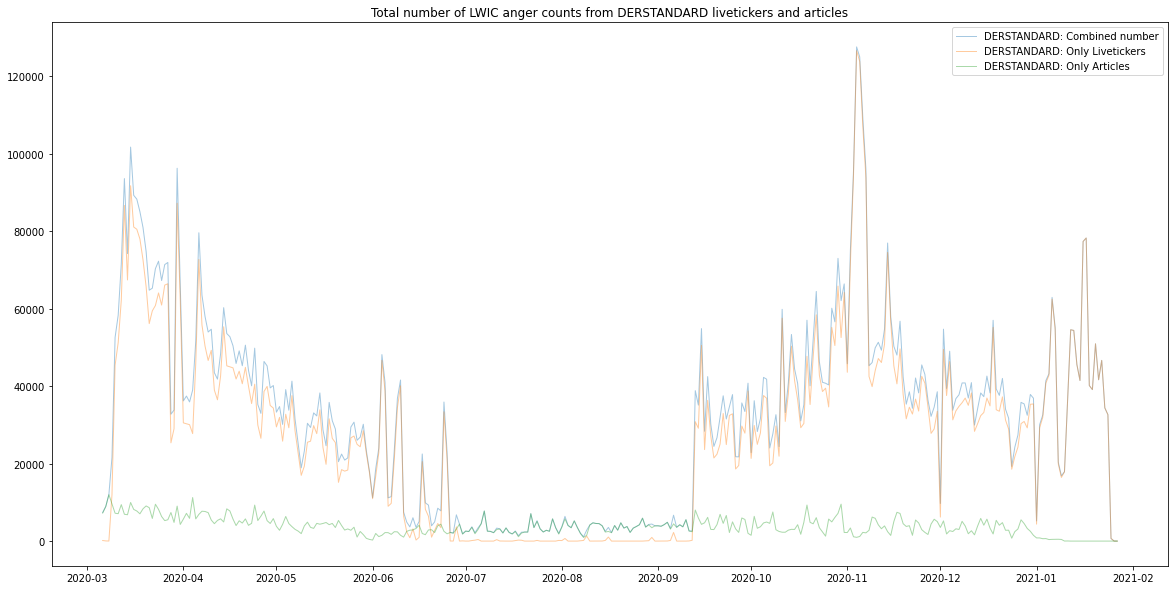

In [23]:
combined = pd.concat([postings['pid'].resample('1d').count(), postings_summer_gap['postid'].resample('1d').count()], axis=1)
combined['pid'] = combined['pid'].fillna(0)
combined['postid'] = combined['postid'].fillna(0)
combined['postings_total'] = combined['pid'] + combined['postid']
combined.index = pd.to_datetime(combined.index, utc=True)

fig, ax = plt.subplots(figsize=(20,10))

plt.title('Total number of LWIC anger counts from DERSTANDARD livetickers and articles')
ax.plot(combined.loc[start:end,'postings_total'], label='DERSTANDARD: Combined number', linestyle='-', linewidth=1, alpha=0.4)
ax.plot(combined.loc[start:end,'pid'], label='DERSTANDARD: Only Livetickers', linestyle='-', linewidth=1, alpha=0.4)
ax.plot(combined.loc[start:end,'postid'], label='DERSTANDARD: Only Articles', linestyle='-', linewidth=1, alpha=0.4)
plt.legend(loc='upper right')

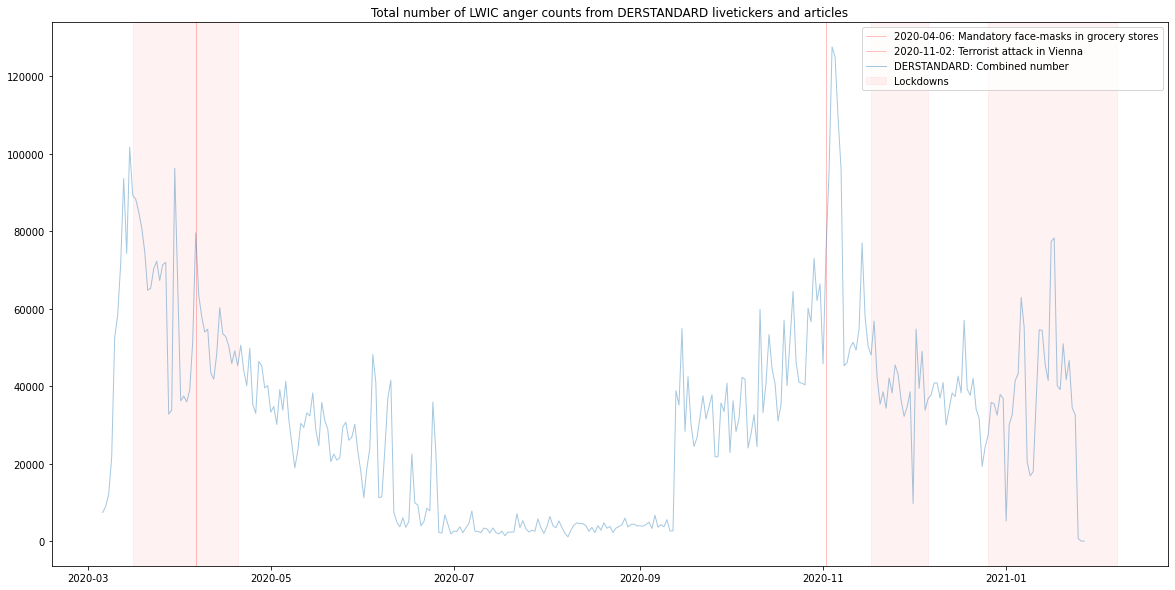

In [26]:
fig, ax = plt.subplots(figsize=(20,10))

ax.axvspan(pd.to_datetime(start_lockdown1), pd.to_datetime(end_lockdown1), color='red', alpha=0.05, label="Lockdowns")
ax.axvspan(pd.to_datetime(start_lockdown2), pd.to_datetime(end_lockdown2), color='red', alpha=0.05)
ax.axvspan(pd.to_datetime(start_lockdown3), pd.to_datetime(end_lockdown3), color='red', alpha=0.05)

ax.axvline(pd.to_datetime('2020-04-06'), linewidth=0.5, color='red', alpha=0.5, label='2020-04-06: Mandatory face-masks in grocery stores')
ax.axvline(pd.to_datetime('2020-11-02'), linewidth=0.5, color='red', alpha=0.5, label='2020-11-02: Terrorist attack in Vienna')

plt.title('Total number of LWIC anger counts from DERSTANDARD livetickers and articles')
ax.plot(combined.loc[start:end,'postings_total'], label='DERSTANDARD: Combined number', linestyle='-', linewidth=1, alpha=0.4)
plt.legend(loc='upper right')

In [24]:
postings[['18', 'number_tokens']].resample('1d').sum()
combined = pd.concat(
    [postings[['18', 'number_tokens']].resample('1d').sum().rename(columns={'18': 'anger_livetickers', 'number_tokens': 'number_tokens_liveticker'}),
     postings_summer_gap[['18', 'number_tokens']].resample('1d').sum().rename(columns={'18': 'anger_articles', 'number_tokens': 'number_tokens_articles'})
    ], axis=1).fillna(0)
combined['anger_both'] = combined['anger_livetickers'] + combined['anger_articles']
combined['number_tokens_both'] = combined['number_tokens_liveticker'] + combined['number_tokens_articles']
combined['anger_rel'] = combined['anger_both'] / combined['number_tokens_both']

combined.head()

,anger_livetickers,number_tokens_liveticker,anger_articles,number_tokens_articles,anger_both,number_tokens_both,anger_rel
2020-01-20 00:00:00+00:00,0.0,0.0,29.0,6610.0,29.0,6610.0,0.004387
2020-01-21 00:00:00+00:00,0.0,0.0,11.0,8101.0,11.0,8101.0,0.001358
2020-01-22 00:00:00+00:00,0.0,0.0,3.0,1634.0,3.0,1634.0,0.001836
2020-01-23 00:00:00+00:00,0.0,0.0,16.0,6794.0,16.0,6794.0,0.002355
2020-01-24 00:00:00+00:00,0.0,0.0,30.0,7173.0,30.0,7173.0,0.004182


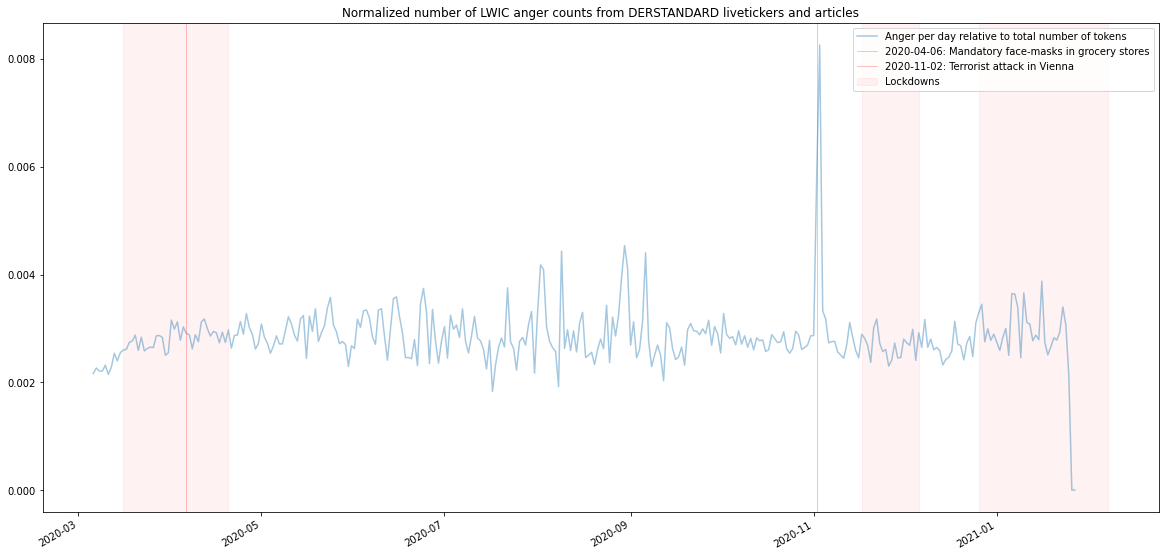

In [32]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(combined.loc[start:end,'anger_rel'], alpha=0.4, label='Anger per day relative to total number of tokens')
ax.axvspan(pd.to_datetime(start_lockdown1), pd.to_datetime(end_lockdown1), color='red', alpha=0.05, label="Lockdowns")
ax.axvspan(pd.to_datetime(start_lockdown2), pd.to_datetime(end_lockdown2), color='red', alpha=0.05)
ax.axvspan(pd.to_datetime(start_lockdown3), pd.to_datetime(end_lockdown3), color='red', alpha=0.05)
ax.axvline(pd.to_datetime('2020-04-06'), linewidth=0.5, color='red', alpha=0.5, label='2020-04-06: Mandatory face-masks in grocery stores')
ax.axvline(pd.to_datetime('2020-11-02'), linewidth=0.5, color='red', alpha=0.5, label='2020-11-02: Terrorist attack in Vienna')

fig.autofmt_xdate()
plt.title('Normalized number of LWIC anger counts from DERSTANDARD livetickers and articles')

lines, labels = ax.get_legend_handles_labels()
ax.legend(loc='upper right')